# Homework 22 - Webscraping in Python

**1.	Create a python function to scrape Yelp data for 50 restaurants close to you OR Craigslist for the top 50 items of any topic interesting to you. Think about what data you want to scrape aside from the name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as possible.**

First, I will import the proper libraries and test my desired url. I am placing the url in an f string so that I can programmatically change the zip code later.

In [1]:
# Load libraries
from bs4 import BeautifulSoup as bs
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
from scrapy import Selector
import requests
import pandas as pd

# this is my zip code
my_zip = 63116

# Yelp url
# use f string, so that "my_zip" can be edited for anyone who wants to use function
url=f'https://www.yelp.com/search?find_desc=Restaurants&find_loc={my_zip}'

# get page response 
response = requests.get(url)
response # yay! successful

<Response [200]>

Then, I will use the Chrome Driver to open up a new browswer, which we'll be able to inspect.

In [109]:
# executable path for a chrome driver
executable_path = {'executable_path':ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False) # False, so that it opens a browser

# Visit the yelp url in our browser
browser.visit(url)



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

In [110]:
soup = bs(browser.html, 'html.parser')

## First page only

In [91]:
# My zip code
my_zip = 63116
    
# Empty lists to append
names_list = []
location_list = []
review_list = []
rating_list = []
comments_list = []
hours_list = []

# use f string, so that "my_zip" can be edited for anyone who wants to use function
url=f'https://www.yelp.com/search?find_desc=Restaurants&find_loc={my_zip}'

# Retaurant names
divs = soup.find_all("div", class_="businessName__09f24__EYSZE display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
for a in divs:
    names = a.find('a', class_='css-1422juy').text
    names_list.append(names)

# Location 
ps = soup.find_all('p', class_='css-1gfe39a')
for span in ps:
    neighborhood = span.find('span', class_='css-1e4fdj9').text
    location_list.append(neighborhood)

# Reviews
revs = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
for rev in revs:
    reviews = rev.find('span', class_="reviewCount__09f24__tnBk4 css-1e4fdj9").text
    review_list.append(reviews)

# Restaurant rating
star_block = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ margin-r1__09f24__rN_ga border-color--default__09f24__NPAKY")
for stars in star_block:
    for star in stars:
        rating = star.div['aria-label']
        rating_list.append(rating)

# Open or closed
div = soup.find_all("div", {"class": "display--inline-block__09f24__fEDiJ margin-t1__09f24__w96jn border-color--default__09f24__NPAKY"})
for d in div:
    hour = d.div.span.text
    if hour != '':
        hours_list.append(hour)

# # Create Data frame
# dictionary = {'Retaurant':names_list,
#              'Neighborhood':location_list,
#              'Total Reviews':review_list,
#              'Rating':rating_list}

# df = pd.DataFrame.from_dict(dictionary)
# df.head()

In [4]:
# # Create Data frame
# dictionary = {'Retaurant':names_list,
#              'Neighborhood':location_list,
#              'Total Reviews':review_list,
#              'Rating':rating_list}

# df = pd.DataFrame.from_dict(dictionary)
# df.head(30)

In [93]:
print(names_list)

['Basil India', 'Jack in the Box', 'The Drawing Board', 'The Golden Hoosier', 'Polite Society', '58hundred', 'Pit Stop', 'Little Fox', 'Stacked STL', 'Kounter Kulture', 'Peacemaker Lobster and Crab', 'Olive + Oak', 'Namaste Restaurant And Bar']


In [94]:
print(location_list)

['Tower Grove South', 'South Hampton', 'Tower Grove South', '$$', 'Lafayette Square', 'Southwest Garden', 'The Hill', 'Fox Park', 'Patch', 'Lindenwood Park', 'Benton Park', '$$$', 'Saint Louis Hills']


In [95]:
print(review_list)

['26', '14', '63', '803', '168', '70', '69', '720', '329', '836', '737', '19']


In [96]:
print(rating_list)

['4.5 star rating', '5 star rating', '4.5 star rating', '4.5 star rating', '4.5 star rating', '5 star rating', '4.5 star rating', '4.5 star rating', '5 star rating', '4 star rating', '4.5 star rating', '4 star rating']


In [97]:
print(hours_list)

['Closed', 'Open all day', 'Open', 'Open', 'Closed', 'Closes in 5 min', 'Closes in 5 min', 'Closes in 5 min', 'Closed', 'Closes in 35 min', 'Open', 'Closed']


## Clicking through multiple pages

In [8]:
# Empty lists to append
names_list = []
location_list = []
review_list = []
rating_list = []
comments_list = []
hours_list = []

my_zip = 63116
url=f'https://www.yelp.com/search?find_desc=Restaurants&find_loc={my_zip}'

# executable path for a chrome driver
executable_path = {'executable_path':ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=True) # False, so that it opens a browser

for next_ in range(10,60,10):
    # get url
    url_next = url + f'&start={next_}'
    
    # Visit the yelp url in our browser
    browser.visit(url_next)
     
    soup = bs(browser.html, 'html.parser')
    
    try:
        # Retaurant names
        divs = soup.find_all("div", class_="businessName__09f24__EYSZE display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
        for a in divs:
            names = a.find('a', class_='css-1422juy').text
            names_list.append(names)

        # Location 
        ps = soup.find_all('p', class_='css-1gfe39a')
        for span in ps:
            neighborhood = span.find('span', class_='css-1e4fdj9').text
            location_list.append(neighborhood)

        # Reviews
        revs = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
        for rev in revs:
            reviews = rev.find('span', class_="reviewCount__09f24__tnBk4 css-1e4fdj9").text
            review_list.append(reviews)

        # Restaurant rating
        star_block = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ margin-r1__09f24__rN_ga border-color--default__09f24__NPAKY")
        for stars in star_block:
            for star in stars:
                rating = star.div['aria-label']
                rating_list.append(rating)

        # Open or closed
        div = soup.find_all("div", {"class": "display--inline-block__09f24__fEDiJ margin-t1__09f24__w96jn border-color--default__09f24__NPAKY"})
        for d in div:
            hour = d.div.span.text
            if hour != '':
                hours_list.append(hour)  
                
    except Exception as e:
        print(e)
    
# Create Data frame
dictionary = {'Retaurant':names_list,
         'Neighborhood':location_list,
         'Total Reviews':review_list,
         'Rating':rating_list}

df = pd.DataFrame.from_dict(dictionary)
df.head()



====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

,Retaurant,Neighborhood,Total Reviews,Rating
0,Songbird,Forest Park Southeast,118,5 star rating
1,Little Fox,Fox Park,69,4.5 star rating
2,Chicken Seven,Carondelet,27,4.5 star rating
3,Namaste Restaurant And Bar,Saint Louis Hills,19,4 star rating
4,Pit Stop,The Hill,70,5 star rating


In [20]:
print(len(names_list))
print(len(location_list))
print(len(review_list))
print(len(rating_list))
print(len(hours_list))

50
50
50
50
9


# Creating function

In [9]:
# Yelp search function
def yelp_search():
    
    # Empty lists to append
    names_list = []
    location_list = []
    review_list = []
    rating_list = []
    comments_list = []
    hours_list = []
    
    # Enter your zip code into the url
    my_zip = input('Enter Your Zip Code')
    my_zip = int(my_zip)
    # url with zip appended
    url=f'https://www.yelp.com/search?find_desc=Restaurants&find_loc={my_zip}'

    # executable path for a chrome driver
    executable_path = {'executable_path':ChromeDriverManager().install()}
    browser = Browser('chrome', **executable_path, headless=True) # True to keep browser closed in function
    
    # iterate through the browser end points
    for next_ in range(10,60,10):
        # get url
        url_next = url + f'&start={next_}'

        # Visit the yelp url in our browser
        browser.visit(url_next)
        # Parse url
        soup = bs(browser.html, 'html.parser')
        
        try:
            # Retaurant names
            divs = soup.find_all("div", class_="businessName__09f24__EYSZE display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
            for a in divs:
                names = a.find('a', class_='css-1422juy').text
                names_list.append(names)

            # Location 
            ps = soup.find_all('p', class_='css-1gfe39a')
            for span in ps:
                neighborhood = span.find('span', class_='css-1e4fdj9').text
                location_list.append(neighborhood)

            # Reviews
            revs = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
            for rev in revs:
                reviews = rev.find('span', class_="reviewCount__09f24__tnBk4 css-1e4fdj9").text
                review_list.append(reviews)

            # Restaurant rating
            star_block = soup.find_all("div", class_="attribute__09f24__hqUj7 display--inline-block__09f24__fEDiJ margin-r1__09f24__rN_ga border-color--default__09f24__NPAKY")
            for stars in star_block:
                for star in stars:
                    rating = star.div['aria-label']
                    rating_list.append(rating)

            # Open or closed
            div = soup.find_all("div", {"class": "display--inline-block__09f24__fEDiJ margin-t1__09f24__w96jn border-color--default__09f24__NPAKY"})
            for d in div:
                hour = d.div.span.text
                if hour != '':
                    hours_list.append(hour)  

        except Exception as e:
            print(e)
    
    # Create Data frame
    dictionary = {'Retaurant':names_list,
             'Neighborhood':location_list,
             'Total Reviews':review_list,
             'Rating':rating_list}

    df = pd.DataFrame.from_dict(dictionary)
    return df.head()   

# Test function

In [18]:
# test function
yelp_search()

Enter Your Zip Code63116




====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

,Retaurant,Neighborhood,Total Reviews,Rating
0,Russell’s on Macklind,South Hampton,618,4.5 star rating
1,Songbird,Forest Park Southeast,118,5 star rating
2,Namaste Restaurant And Bar,Saint Louis Hills,19,4 star rating
3,Little Fox,Fox Park,69,4.5 star rating
4,The Wood Shack Soulard,Soulard,238,4.5 star rating


**2. Create a local API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all.**

In [12]:
from flask import Flask
from flask_restful import Resource, Api, reqparse
import ast

In [19]:
app = Flask(__name__)
api = Api(app)

class Scrape(Resource):
    # call my function
    yelp_search()
    
class All(Resource):
    # methods go here
    pass
    
api.add_resource(Scrape, '/scrape')  # '/users' is our entry point for Users
api.add_resource(All, '/all')  # and '/locations' is our entry point for Locations

if __name__ == '__main__':
    app.run()  # run our Flask app

Enter Your Zip Code63116




====== WebDriver manager ======
Could not get version for google-chrome with the command:  powershell "$ErrorActionPreference='silentlycontinue' ; (Get-Item -Path "$env:PROGRAMFILES\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion ; if (-not $? -or $? -match $error) { (Get-Item -Path "$env:PROGRAMFILES(x86)\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { (Get-Item -Path "$env:LOCALAPPDATA\Google\Chrome\Application\chrome.exe").VersionInfo.FileVersion } if (-not $? -or $? -match $error) { reg query "HKCU\SOFTWARE\Google\Chrome\BLBeacon" /v version } if (-not $? -or $? -match $error) { reg query "HKLM\SOFTWARE\Wow6432Node\Microsoft\Windows\CurrentVersion\Uninstall\Google Chrome" /v version }"
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been 

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Feb/2022 12:32:44] "GET / HTTP/1.1" 404 -
[2022-02-26 12:32:52,180] ERROR in app: Exception on /scrape [GET]
Traceback (most recent call last):
  File "C:\Users\artol\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\artol\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "C:\Users\artol\lib\site-packages\flask_restful\__init__.py", line 467, in wrapper
    resp = resource(*args, **kwargs)
  File "C:\Users\artol\lib\site-packages\flask\views.py", line 84, in view
    return current_app.ensure_sync(self.dispatch_request)(*args, **kwargs)
  File "C:\Users\artol\lib\site-packages\flask_restful\__init__.py", line 572, in dispatch_request
    assert meth is not None, 'Unimplemented method %r' % request.method
AssertionError: Unimplemented method 

**3. What is web scraping? Why is it helpful? What does it mean for your online presence? Refence the readings and DataCamp.**

Web scraping is a method of extracting information through the source code of various websites. One can achieve this by utilizing various "tags" within the source code to search for specific names, classes, etc. and then extract the data. This can be helpful for a variety of reasons. For one, it can be a way to systematically organize data that would otherwise be scattered across pages within a website. This scattered and potentially unsctructed format can prevent analysis and data insight. However, if the data are retrieved through web-scraping, we can reformat into lists, data frames, dictionaries and other useful data sctructures. The instructor from the data camp video, for instance, completed a famous analysis on crime statistics through the use of web scraping. His team scraped data from city agencies across the country in order to create one unified visual, compiling and summarizing the data from the different cities. 

Regarding my own online presence, I can pull information for different topics that interest me. For instance, in my current role, there are COVID-19 vaccination numbers scattered across various local public health agencies. The information is often posted, but infrequently in a simple and downloadable format. Webscraping could be a way for me to gather all of this information in a way that is more useful and that better explains vaccination numbers as a whole. On a personal level, I can scrape the web for things like concert tickets, online sales, and new zillow listings near me! In general, this seems to be a super useful skill that we can apply to most anything we'd like.

## Data Camp

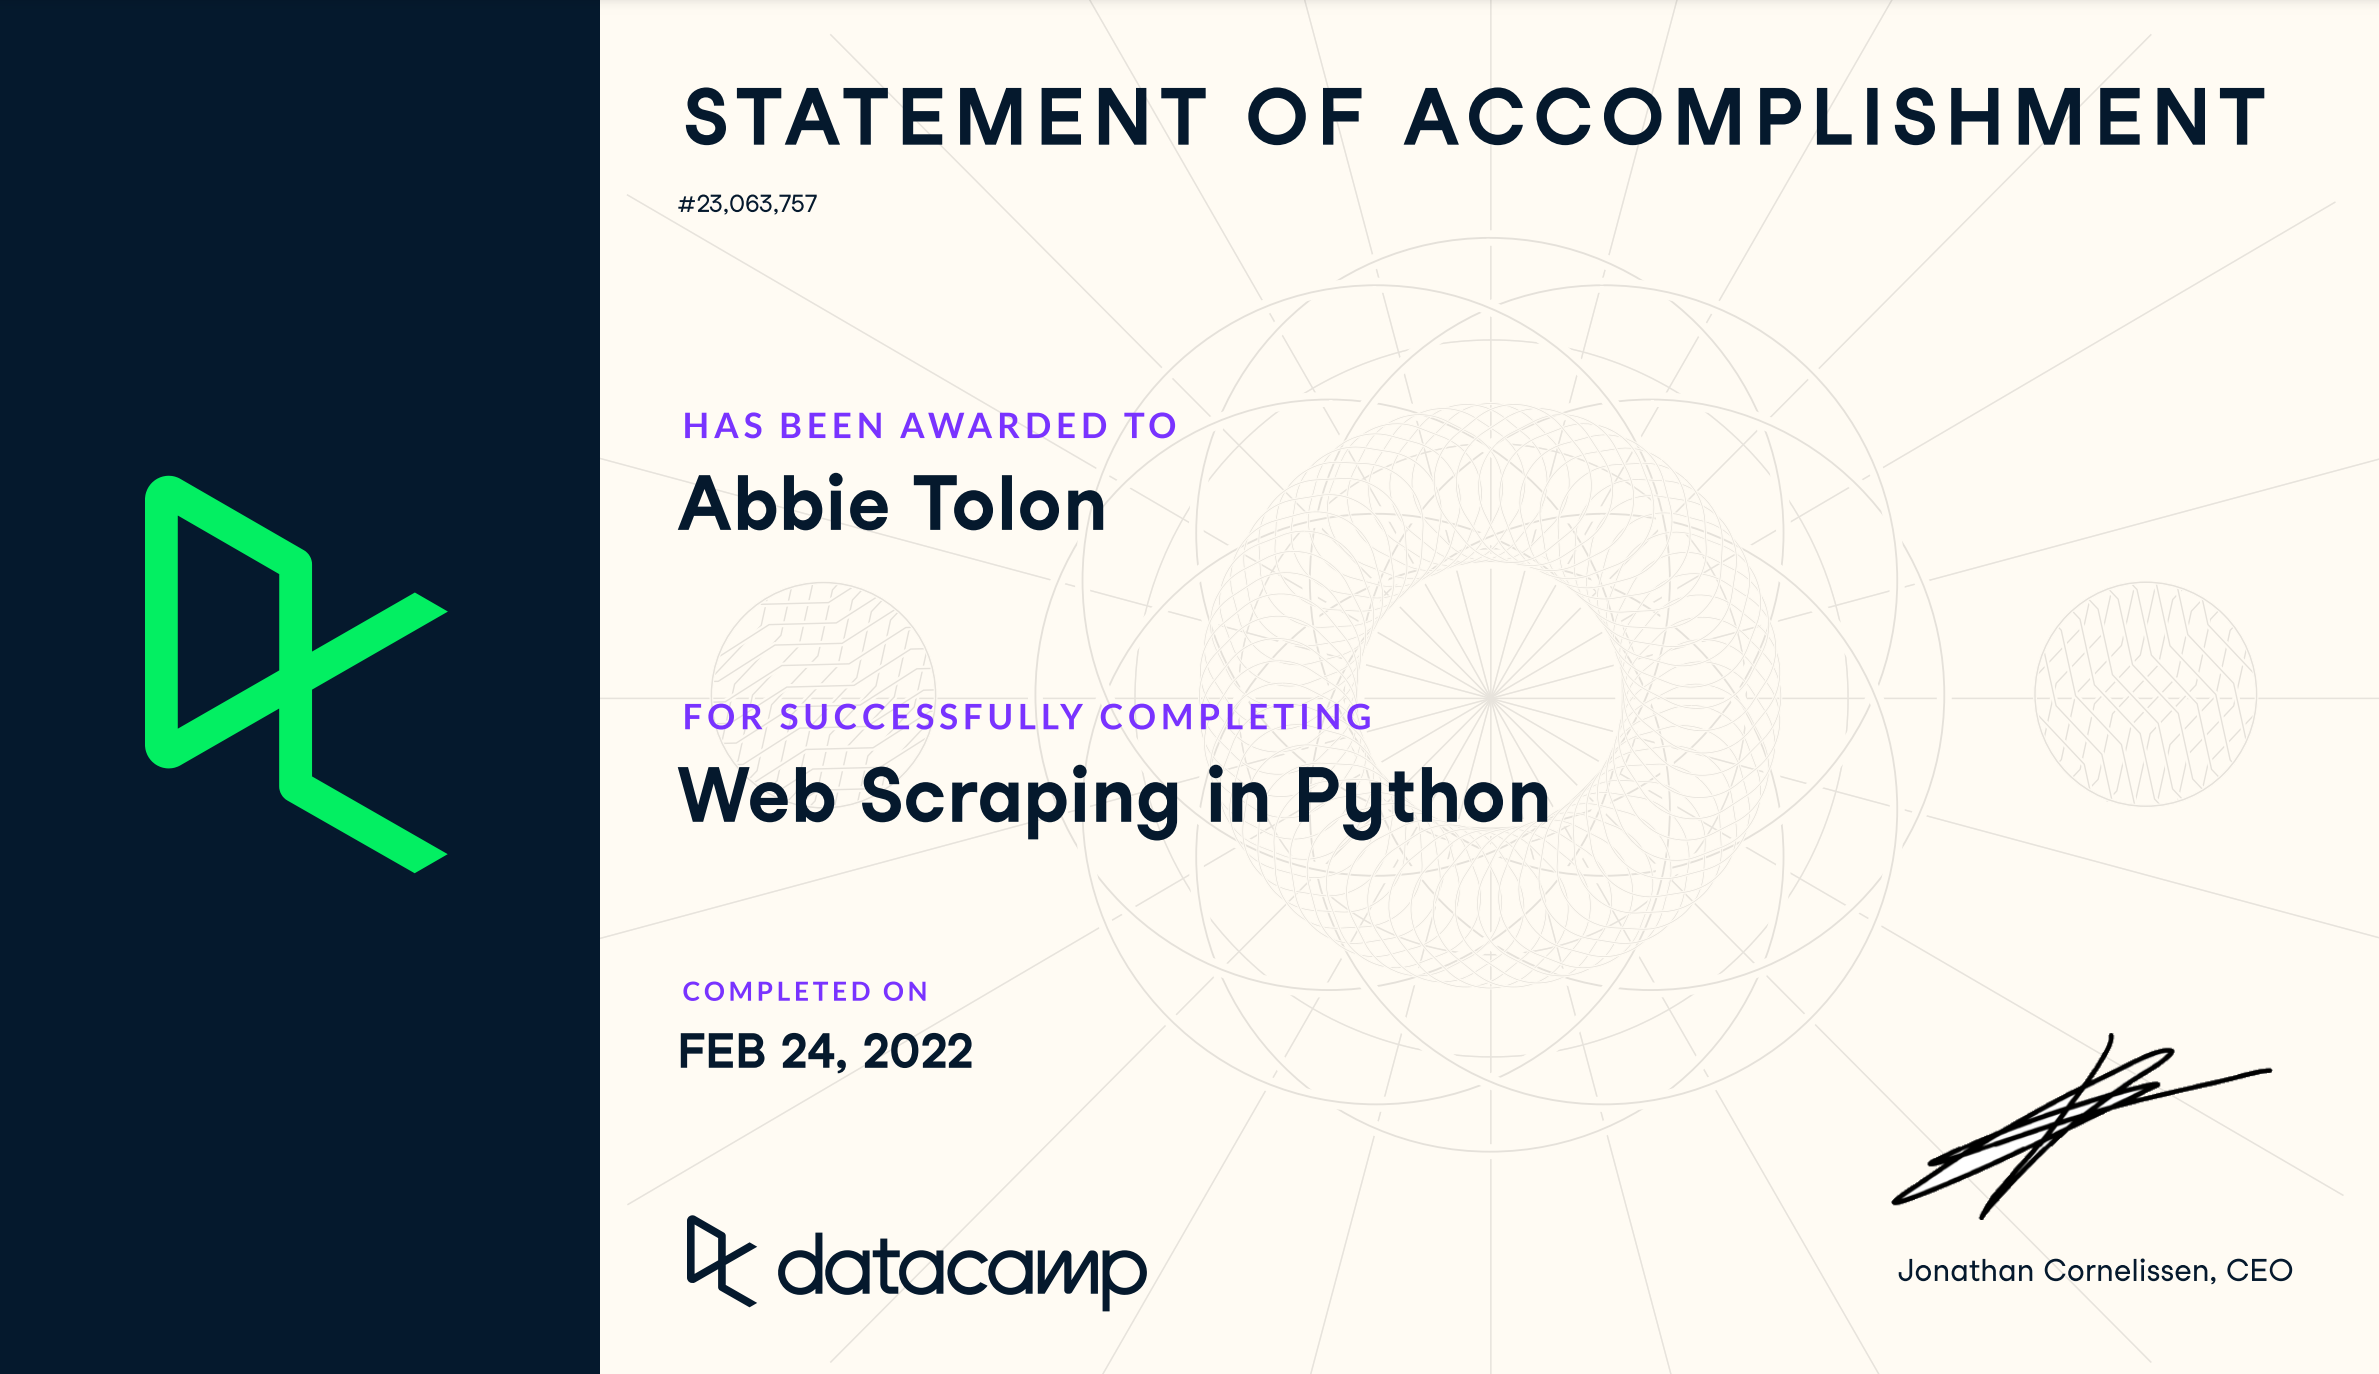